In [1]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Install dependencies

In [ ]:
pip install pandas==1.3.5 geopandas==0.10.2 matplotlib==3.5.1 mapclassify==2.4.3

### Import libraries

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import datetime
import matplotlib.pyplot as plt
import geopandas
import mapclassify
import urllib.request
import zipfile

In [7]:
# Dataset is available in several formats, we use CSV for this sample
dataset_url = "https://raw.githubusercontent.com/microsoft/USBroadbandUsagePercentages/master/dataset/broadband_data_2020October.csv"
# Download the data and load it into a Data Frame
urllib.request.urlretrieve(dataset_url, "broadband_data_2020October.csv")
df = pd.read_csv("broadband_data_2020October.csv",low_memory = False, skiprows=18)
df.rename({"COUNTY ID":"GEOID"}, axis = 1, inplace = True)
df.columns.values[4] = "BROADBAND_USAGE"
df["BROADBAND_USAGE"]= (100 * (pd.to_numeric(df['BROADBAND_USAGE'], errors='coerce').fillna(0))).astype(int)

### Get the [US Census](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) data to create the map

In [8]:
output_zip_name = "cb_2018_us_county_500k.zip"
extraction_dir = "us_maps/"
urllib.request.urlretrieve("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip", output_zip_name)
# Unzip the file
with zipfile.ZipFile(output_zip_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)
    print("Maps downloading and extraction completed!")

Maps downloading and extraction completed!


### Merge the geographic information with the covid data and display on map.
We show a heatmap with deaths for a specific day.

In [9]:
extraction_dir = "us_maps/"
geo_states = geopandas.read_file(extraction_dir + "cb_2018_us_county_500k.shp")
# See the data for the state of Washington
geo_states = geo_states.loc[(geo_states["STATEFP"].astype(int) == 53)]
geo_states["GEOID"]= geo_states["GEOID"].astype(int)
geo_merge = geo_states.merge(df,on='GEOID')

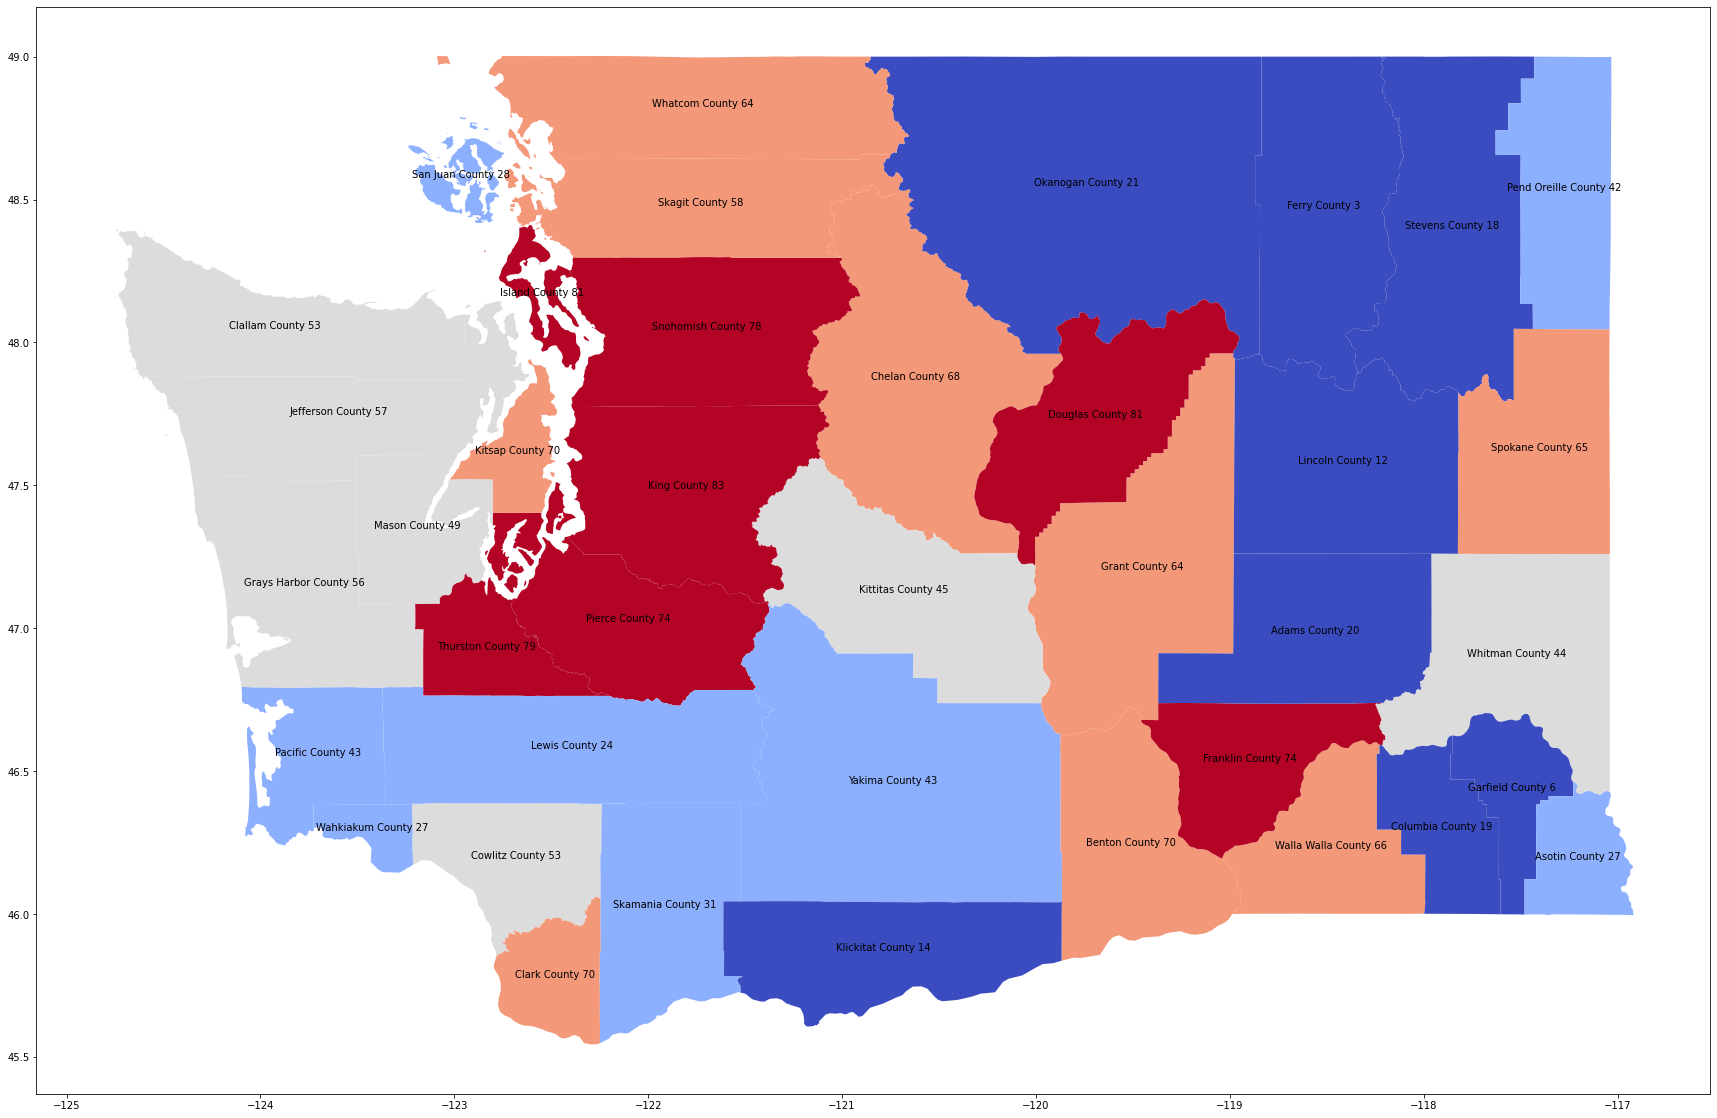

In [10]:
ax = geo_merge.plot(column = "BROADBAND_USAGE",scheme = "quantiles",figsize = (50,20),cmap = "coolwarm")
geo_merge.apply(lambda x: ax.annotate(text = x["COUNTY NAME"] + " " + str(x["BROADBAND_USAGE"]), xy = x.geometry.centroid.coords[0], ha = "center"), axis = 1);